# Modelos de Classificação

In [105]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

## Carregando o dataset e explorando

In [2]:
df = pl.read_csv('data/airlines.csv')
df.head()

Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
f64,f64,f64,str,str,str,i64,i64
2313.0,1296.0,141.0,"""DL""","""ATL""","""HOU""",1,0
6948.0,360.0,146.0,"""OO""","""COS""","""ORD""",4,0
1247.0,1170.0,143.0,"""B6""","""BOS""","""CLT""",3,0
31.0,1410.0,344.0,"""US""","""OGG""","""PHX""",6,0
563.0,692.0,98.0,"""FL""","""BMI""","""ATL""",4,0


In [3]:
df.shape

(539382, 8)

In [4]:
df.describe()

describe,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
str,f64,f64,f64,str,str,str,f64,f64
"""count""",539382.0,539382.0,539382.0,"""539382""","""539382""","""539382""",539382.0,539382.0
"""null_count""",0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0
"""mean""",2427.927988,802.728161,132.202104,null,null,null,3.929666,0.445443
"""std""",2067.4317,278.045546,70.117045,null,null,null,1.914666,0.497015
"""min""",1.0,10.0,0.0,"""9E""","""ABE""","""ABE""",1.0,0.0
"""25%""",712.0,565.0,81.0,null,null,null,2.0,0.0
"""50%""",1809.0,795.0,115.0,null,null,null,4.0,0.0
"""75%""",3745.0,1035.0,162.0,null,null,null,5.0,1.0
"""max""",7814.0,1439.0,655.0,"""YV""","""YUM""","""YUM""",7.0,1.0


### Visualização dos dados

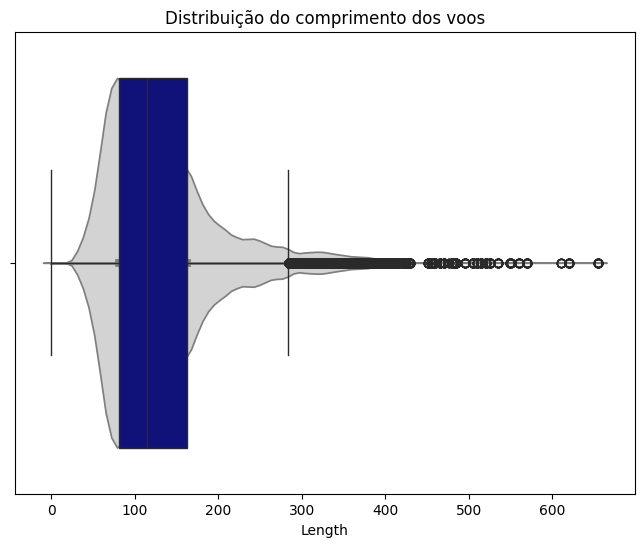

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(data=df, x='Length', ax=ax, color='lightgray')
sns.boxplot(data=df, x='Length', ax=ax, color='darkblue')

ax.set_title('Distribuição do comprimento dos voos')
plt.show()

Será que existe relação entre atraso (Class) de acordo com o comprimento do voo?

<Axes: xlabel='Class', ylabel='Length'>

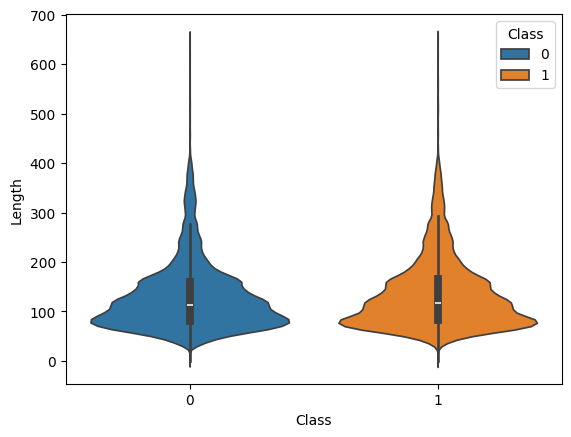

In [19]:
sns.violinplot(data=df, y='Length', x = 'Class', hue='Class')

In [43]:
df.to_pandas().groupby('Class').describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

Vamos verificar a relação entre a variável `Class` (Atraso) com a compainha área

<Axes: xlabel='Airline', ylabel='count'>

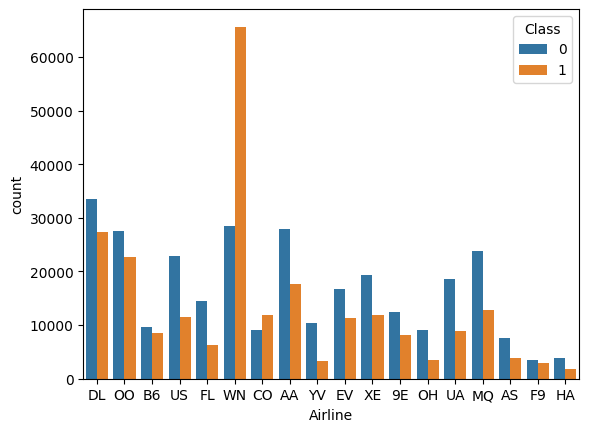

In [45]:
sns.countplot(data=df, x='Airline', hue='Class')

E os atrasos de acordo com o dia da semana?

<Axes: xlabel='DayOfWeek', ylabel='count'>

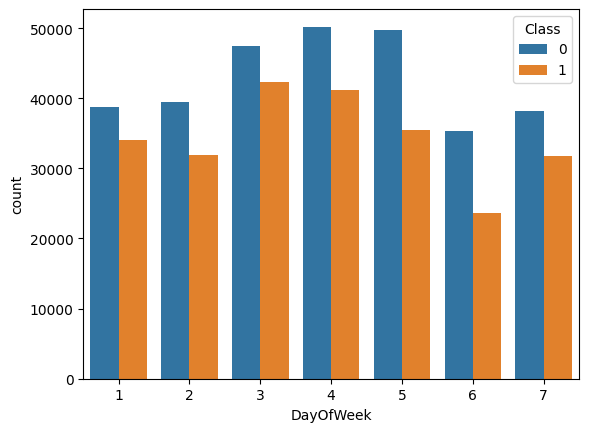

In [49]:
sns.countplot(data=df, x='DayOfWeek', hue='Class', order=range(1, 8))

Vamos verificar o "balanço" do dataframe em relação a variável `Class` (Atraso)

<Axes: xlabel='Class', ylabel='count'>

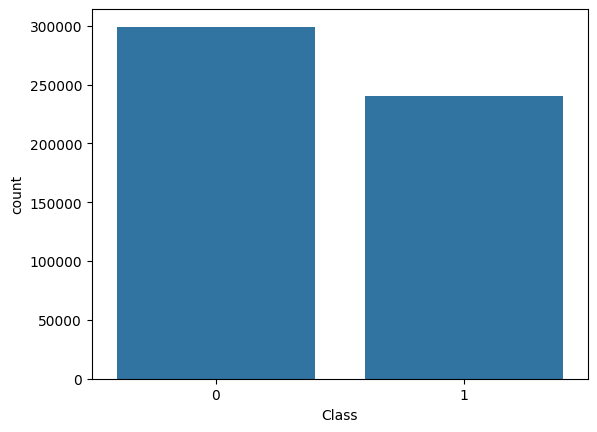

In [50]:
sns.countplot(data=df, x='Class')

É importante termos uma base balanceada. Caso contrário, o modelo pode ficar enviesado para a classe majoritária.

## Pré-processamento

Para utilizarmos as variáveis categoricas, precisamos transformá-las em numéricas através de alguma técnica de codificação. Neste caso usaremos o `LabelEncoder` do `sklearn`.

O `LabelEncoder` transforma as categorias em números de 0 a N-1, onde N é o número de categorias.

Existem discussões sobre a utilização do `LabelEncoder` em variáveis categóricas. O ideal é utilizar o `OneHotEncoder` que transforma cada categoria em uma coluna binária. Porém, para simplificar o exemplo, utilizaremos o `LabelEncoder`. (https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936#61217936)

Para evitar data leakage, o `LabelEncoder` deveria ser treinado apenas com os dados de treino. Porém, apenas para simplificar o exemplo, treinaremos o `LabelEncoder` com todos os dados.

In [68]:
X = df.select(pl.all().exclude('Class'))
y = df.select('Class')

In [69]:
le_AirportFrom = LabelEncoder().fit(X['AirportFrom'])
le_AirportTo = LabelEncoder().fit(X['AirportTo'])
le_Airline = LabelEncoder().fit(X['Airline'])

# Transformando as variáveis categóricas em numéricas
X = X.with_columns(
    pl.Series(le_AirportFrom.transform(X['AirportFrom'])).alias('AirportFrom'),
    pl.Series(le_AirportTo.transform(X['AirportTo'])).alias('AirportTo'),
    pl.Series(le_Airline.transform(X['Airline'])).alias('Airline')
)

Podemos verificar que as variáveis foram transformadas

In [70]:
X.head()

Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek
f64,f64,f64,i64,i64,i64,i64
2313.0,1296.0,141.0,5,16,129,1
6948.0,360.0,146.0,12,65,208,4
1247.0,1170.0,143.0,3,35,60,3
31.0,1410.0,344.0,14,203,217,6
563.0,692.0,98.0,8,32,16,4


Vamos fazer a separação dos dados em treino e teste

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Treinando o modelo de Naive Bayes

Naive Bayes é um modelo probabilístico baseado no teorema de Bayes. É um modelo simples e rápido. Ele calcula a probabilidade de uma instância pertencer a uma classe, dado as features. Ele assume que as features são independentes, ou seja, a presença ou ausência de uma feature não afeta a presença ou ausência de outra.

In [74]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.to_numpy().ravel())

GaussianNB()

In [75]:
y_pred = gnb.predict(X_test)

Vamos avaliar o modelo usando a acurácia

In [78]:
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')

Acurácia: 0.59


De modo geral, o modelo não apresentou um bom desempenho.

Nesse caso, podemos encontrar alguns desafios (limitações) sobre os modelos classificadores:

- Quantidade insuficiente de dados: o modelo não consegue aprender com poucos dados. Nesse caso, precisamos de mais dados para treinar o modelo.

- Dados desbalanceados: o modelo pode ficar enviesado para a classe majoritária. Nesse caso, precisamos balancear os dados.

- Dados de baixa qualidade: o modelo pode não conseguir aprender com dados de baixa qualidade. Nesse caso, precisamos melhorar a qualidade dos dados.

- Features irrelevantes: o modelo pode não conseguir aprender com features irrelevantes. Nesse caso, precisamos selecionar as features mais relevantes.

## Equilibrando os dados

Para equilibrar os dados, usaremos a técnica de oversampling. Essa técnica consiste em replicar os dados da classe minoritária até que a quantidade de dados seja igual a da classe majoritária.

https://www.quora.com/Is-it-a-good-idea-to-undersample-or-oversample-a-heavily-imbalanced-dataset-from-a-statistical-perspective

In [83]:
df_majority = df.filter(pl.col('Class') == 0)
df_minority = df.filter(pl.col('Class') == 1)

print(f"Majority: {df_majority.shape}")
print(f"Minority: {df_minority.shape}")

Majority: (299118, 8)
Minority: (240264, 8)


Vamos fazer o oversampling da classe minoritária

In [86]:
df_minority = resample(df_minority, n_samples=len(df_majority), random_state=7)

In [87]:
print(f"Majority: {df_majority.shape}")
print(f"Minority: {df_minority.shape}")

Majority: (299118, 8)
Minority: (299118, 8)


Junta os dados da classe majoritária com os dados da classe minoritária

In [88]:
df_resampled = pl.concat([df_majority, df_minority])

<Axes: xlabel='Class', ylabel='count'>

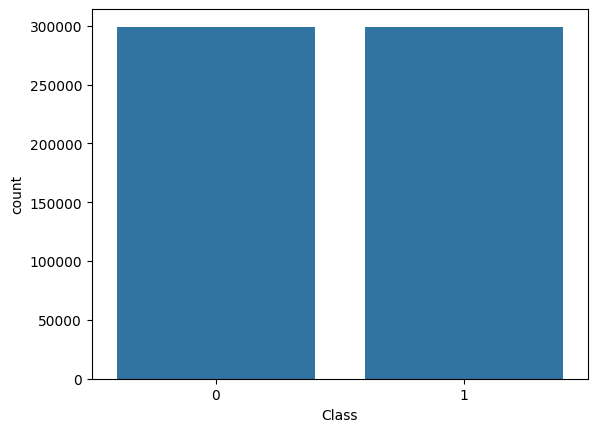

In [90]:
sns.countplot(data=df_resampled, x='Class')

## Testando o modelo com os dados balanceados

In [100]:
X = df_resampled.select(pl.col(['Flight', 'Time', 'Length', 'DayOfWeek']))
y = df_resampled.select('Class')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [102]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.to_numpy().ravel())

GaussianNB()

In [103]:
y_pred = gnb.predict(X_test)

In [104]:
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')

Acurácia: 0.57


## Treinando um modelo de Random Forest

In [106]:
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train.to_numpy().ravel())

RandomForestClassifier(random_state=7)

In [107]:
y_pred = rf.predict(X_test)

In [108]:
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')

Acurácia: 0.69
